#### Performing EDA and findind out the under performing dealers.

In [19]:
import numpy as np
import pandas as pd

#### Loading Data Set

In [5]:
retail_df = pd.read_csv("retail_data.csv", encoding='latin-1')

In [6]:
retail_df.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 40 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

#### looking at size of data

In [16]:
retail_df.shape

(229, 40)

#### looking at statistical details of data

In [17]:
retail_df.describe()

,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Second Action-Call Status.1,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,229.000000,183.000000,48.000000,48.000000,0.0,229.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,601742.572052,1.842459,1.874375,10.229167,NaN,1045.323144,0.243243,0.648649,0.486486,0.081081,0.027027,0.162162
std,6573.378113,2.595590,2.313372,14.925688,NaN,220.032076,0.434959,0.483978,0.506712,0.276725,0.164399,0.373684
min,600001.000000,0.010000,0.070000,1.000000,NaN,650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,600033.000000,0.550000,0.530000,2.000000,NaN,921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600059.000000,1.070000,1.150000,6.000000,NaN,1030.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,600099.000000,2.000000,1.622500,10.500000,NaN,1129.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,635810.000000,25.000000,10.950000,73.000000,NaN,3121.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### looking at all the columns  

In [30]:
retail_df.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

#### Checking for null values

In [10]:
retail_df.isnull().apply(pd.value_counts)

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
False,229.0,229.0,229.0,229.0,229.0,229.0,229.0,229.0,229.0,229.0,...,NaN,171,229.0,53,37,37,37,37,37,37
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,229.0,58,NaN,176,192,192,192,192,192,192


#### null values percentage in data

In [18]:
(retail_df.isnull().apply(pd.value_counts)/len(retail_df))*100

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
False,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,NaN,74.672489,100.0,23.144105,16.157205,16.157205,16.157205,16.157205,16.157205,16.157205
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,25.327511,NaN,76.855895,83.842795,83.842795,83.842795,83.842795,83.842795,83.842795


#### here we don't need to treat null values because we are not building a model.

In [23]:
retail_df["Allocation Status"].value_counts()

Dealer    165
Direct     64
Name: Allocation Status, dtype: int64

In [24]:
# We need only Dealer Data 

In [44]:
dealer = retail_df[retail_df["Allocation Status"]=="Dealer"]

In [45]:
dealer_data = dealer[dealer["Dealer Name"]!="Direct"]

In [46]:
dealer_data.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looking at number of dealers 

In [48]:
dealer_data["Dealer Name"].value_counts() #we see a mistake in pearlson dealer name 

Windoors      45
Sunbird       33
OXXO          20
Winfratech    20
Rajtechnis    15
ITP           13
Pearlson       8
pearlson       7
Name: Dealer Name, dtype: int64

In [49]:
dealer_data["Dealer Name"].replace(to_replace='pearlson',value="Pearlson",inplace=True)  

C:\Users\cenar\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [50]:
dealer_data["Dealer Name"].value_counts() 

Windoors      45
Sunbird       33
OXXO          20
Winfratech    20
Pearlson      15
Rajtechnis    15
ITP           13
Name: Dealer Name, dtype: int64

In [51]:
# There are 7 Dealers in total

In [52]:
# Looking at Dealers Order Status 

In [55]:
import seaborn as sns

In [59]:
pd.crosstab(dealer_data["Dealer Name"],dealer_data["Status"])

Status,Lost,Won
Dealer Name,,
ITP,13,0
OXXO,16,4
Pearlson,11,4
Rajtechnis,14,1
Sunbird,24,9
Windoors,39,6
Winfratech,18,2


#### conversion rate of dealers  

In [112]:
CONVERSION_RATE = pd.crosstab(dealer_data["Dealer Name"],dealer_data["Status"]).apply(lambda r:r/r .sum(),axis=1)
CONVERSION_RATE

Status,Lost,Won
Dealer Name,,
ITP,1.000000,0.000000
OXXO,0.800000,0.200000
Pearlson,0.733333,0.266667
Rajtechnis,0.933333,0.066667
Sunbird,0.727273,0.272727
Windoors,0.866667,0.133333
Winfratech,0.900000,0.100000


In [ ]:
# from the above analysis we can say that sunbird has a good conversion rate of all the dealers.

Text(0.5, 1.0, 'Order Status Won/Lost By Dealers')

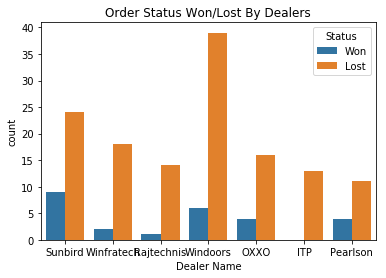

In [61]:
sns.countplot(x="Dealer Name",hue="Status",data=dealer_data).set_title("Order Status Won/Lost By Dealers")

In [62]:
# checkign area wise orders count

In [70]:
dealer_data["City"].value_counts()

CHENNAI           111
THIRUVALLUR        20
KANCHIPURAM        18
VELLORE             6
KRISHNAGIRI         2
VILLUPURAM          2
CUDDALORE           1
TIRUVANNAMALAI      1
Name: City, dtype: int64

In [64]:
pd.crosstab(dealer_data["Dealer Name"],dealer_data["City"])

City,CHENNAI,CUDDALORE,KANCHIPURAM,KRISHNAGIRI,THIRUVALLUR,TIRUVANNAMALAI,VELLORE,VILLUPURAM
Dealer Name,,,,,,,,
ITP,7,0,1,0,4,0,0,1
OXXO,11,0,3,0,6,0,0,0
Pearlson,15,0,0,0,0,0,0,0
Rajtechnis,14,0,0,0,1,0,0,0
Sunbird,25,0,6,0,1,1,0,0
Windoors,24,1,3,2,8,0,6,1
Winfratech,15,0,5,0,0,0,0,0


we can see almost most of the orders are coming from Chennai City followed by Kanchipuram so better tofocus more on chennai region for improvement in sales.

In [67]:
# checking for project type in orders 

In [69]:
dealer_data["Type of Project"].value_counts()

Renovation          105
New Construction     56
Name: Type of Project, dtype: int64

Text(0.5, 1.0, ' Order Status based on Type of Project')

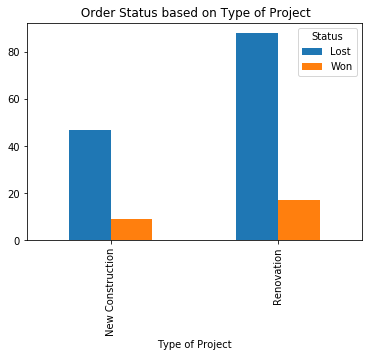

In [81]:
pd.crosstab(dealer_data['Type of Project'],dealer_data["Status"]).plot(kind="bar").set_title(" Order Status based on Type of Project")

In [71]:
pd.crosstab(dealer_data['Type of Project'],dealer_data["Status"])

Status,Lost,Won
Type of Project,,
New Construction,47,9
Renovation,88,17


In [72]:
pd.crosstab(dealer_data['Type of Project'],dealer_data["Status"]).apply(lambda r:r/r .sum(),axis=1)

Status,Lost,Won
Type of Project,,
New Construction,0.839286,0.160714
Renovation,0.838095,0.161905


 almost both the type of project has same conversion rate not much difference

### Reasons  Why Order is lost for dealers 

In [79]:
dealer_data["Remarks"].value_counts()

Price Issue                      79
Design Infeasibility             20
Budget Constraint                20
Price issue                       3
Delivery Issue                    2
Design Infeasibe My               1
Others                            1
Delivery Issve                    1
No Requirment                     1
No Requirement-Awareness Call     1
Design Not Feasible               1
Name: Remarks, dtype: int64

Text(0.5, 1.0, 'Reasons for loosing a Order')

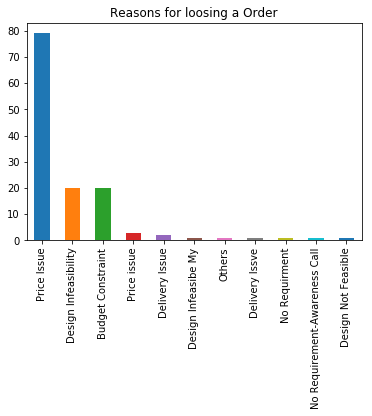

In [82]:
dealer_data["Remarks"].value_counts().plot(kind= "bar").set_title("Reasons for loosing a Order")

we can clearly say that almost 70% of the reason for loosing a order is PRICE ISSUE so need to keep in my mind that there might be competitors in the market who are offering for less price comparatively also need to look in design feasibility options provided for customers.

In [83]:
dealer_data["Benefits"].value_counts()

Reduce Street Noise                      6
Nil                                      5
Reduce AC Energy Cost & Street Noise     4
Aesthetics & Low Maintenance             3
Low Maintenance                          2
Aesthetics & Street Noise                1
Reduce Street noise                      1
Low Maintenance & Aesthetics             1
nil                                      1
Noise Proof & Better Lighting            1
Reduce Street Noise & Low Maintenance    1
Name: Benefits, dtype: int64

When the order is succesfull most times Reduce Street Noise Benefit is given

In [85]:
dealer_data["First Action-Call Status"].value_counts()

Appointment Fixed                132
Budget Constraint                 19
Design not Feasible                6
No Requirement-Awareness Call      3
Time Frame Not Possible            1
Name: First Action-Call Status, dtype: int64

In [87]:
dealer_data["First Action-Call Status"].count()

161

In [88]:
dealer_data["Second Action-Call Status"].value_counts()

Quote to Be Submitted       129
Further Meeting Required      1
Design not Feasible           1
Name: Second Action-Call Status, dtype: int64

In [89]:
dealer_data["Second Action-Call Status"].count()

131

Here when the first call was made, out of 161 customers 132 customers have fixed an appointment and 19 customers dropped due to budget constraint not a big number to worry as of now and in second call status out of 132 customers who are scheduled for meeting 129 customers asked for the Price Quotation.

In [90]:
dealer_data["Q Val. (Rs. Lac)"].count()

124

 But finally only 124 customers have taken Price Quotation 

A Simple Loop For Finding the Dealer wise Price Quotations Total

In [93]:
Price_Quotation_Dealer_wise = pd.Series()
for i in dealer_data['Dealer Name'].unique():
    Price_Quotation_Dealer_wise[i] = dealer_data[dealer_data['Dealer Name']==i]["Q Val. (Rs. Lac)"].sum() 
Price_Quotation_Dealer_wise    

Sunbird       46.41
Winfratech    16.62
Rajtechnis    14.81
Windoors      69.82
OXXO          26.49
ITP           17.45
Pearlson      15.89
dtype: float64

Total Number Of Orders Each Dealer Got 

In [97]:
Orders_each_dealer_got = pd.Series()

for i in dealer_data["Dealer Name"].unique():
    Orders_each_dealer_got[i] = dealer_data[dealer_data['Dealer Name']==i]['Status'].count()
Orders_each_dealer_got

Sunbird       33
Winfratech    20
Rajtechnis    15
Windoors      45
OXXO          20
ITP           13
Pearlson      15
dtype: int64

Here Sunbird has got highest number of orders and it have quotation price of worth 46 lakhs and it is followed by Winfratech,Rajtechnis,Windoors,OXXO,ITP,Pearlson but what is the final Conversion rate And which dealer has highest Order Price

In [98]:
dealer_data["Order Val. (Rs. Lac)"].count()

24

In [101]:
dealer_data[dealer_data["Status"]=="Won"]["Status"].count()

26

Here we have mismatch between total orders which got won status and Order Value. There are 2 missing values in Order Value  

In [102]:
dealer_data["Order Val. (Rs. Lac)"].describe()

count    24.000000
mean      1.901667
std       2.559672
min       0.070000
25%       0.537500
50%       1.080000
75%       1.507500
max      10.950000
Name: Order Val. (Rs. Lac), dtype: float64

In [118]:
Order_value_Dealer_wise = pd.Series()
for i in dealer_data['Dealer Name'].unique():
    Order_value_Dealer_wise[i] = dealer_data[dealer_data['Dealer Name']==i]["Order Val. (Rs. Lac)"].sum() 
Order_value_Dealer_wise

Sunbird       10.30
Winfratech     2.11
Rajtechnis     0.53
Windoors      11.54
OXXO           7.39
ITP            0.00
Pearlson      13.77
dtype: float64

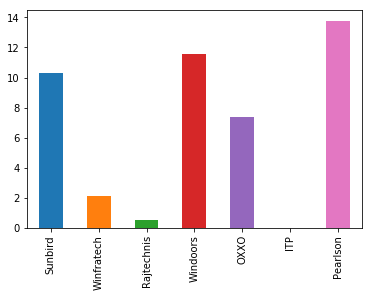

In [108]:
Order_value_Dealer_wise.plot(kind="bar")

In [111]:
Order_value_Dealer_wise.describe()

count     7.000000
mean      6.520000
std       5.636884
min       0.000000
25%       1.320000
50%       7.390000
75%      10.920000
max      13.770000
dtype: float64

In [114]:
CONVERSION_RATE['Won'].describe()

count    7.000000
mean     0.148485
std      0.102777
min      0.000000
25%      0.083333
50%      0.133333
75%      0.233333
max      0.272727
Name: Won, dtype: float64

Now we can find the under performers by 2 ways by looking at their CONVERSION RATE of orders and by Average ORDER VALUE the avg order value is 6.52 lakhs but again avg order value depends on the ORDER QUANTITY so  we need to take both average CONVERSION RATE and Average ORDER VALUE to evaluate the Performers  

The Average Conversion Rate and Average Order Quantity are 14.8% and 6.52 lakhs respectively

Now Under Performing Dealers Are :

In [119]:
Order_value_Dealer_wise

Sunbird       10.30
Winfratech     2.11
Rajtechnis     0.53
Windoors      11.54
OXXO           7.39
ITP            0.00
Pearlson      13.77
dtype: float64

In [120]:
CONVERSION_RATE

Status,Lost,Won
Dealer Name,,
ITP,1.000000,0.000000
OXXO,0.800000,0.200000
Pearlson,0.733333,0.266667
Rajtechnis,0.933333,0.066667
Sunbird,0.727273,0.272727
Windoors,0.866667,0.133333
Winfratech,0.900000,0.100000


Here Sunbird, OXXO, Pearlson Clearly comes under Top Performer

Windoors have good Order value and conversion rate is 1% below the average so we can consider it as a good performer

Winfratech,Rajtechnis,ITP these DEALERS are the UNDER PERFORMERS 